# **{M} Google Drive mount**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **{M} imports**


In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt

!pip install mne --upgrade
import mne

from mne.filter import notch_filter as notch
from mne.time_frequency import tfr_morlet as morl
from mne.time_frequency import tfr_array_morlet as amorl

from mne.decoding import UnsupervisedSpatialFilter
from sklearn.decomposition import PCA

from mne.decoding import CSP
from sklearn.model_selection import train_test_split as Split

print('[imports successfully loaded]')

     |████████████████████████████████| 6.8MB 2.8MB/s 
[imports successfully loaded]


# {M} Load data

In [3]:
DATA_DIR = '/content/drive/My Drive/Colab Notebooks/Project Domino/Macros/'

def get_paths(dir):
    subj_names = os.listdir(dir)
    paths = {}
    for name in subj_names:
        path = DATA_DIR + f'{name}/eeglab/'
        sets = [path + st for st in os.listdir(path) if "Picked" in st]
        paths[name] = sets
    return paths

paths = get_paths(DATA_DIR)
names = sorted(paths.keys())

paths


{'D006': ['/content/drive/My Drive/Colab Notebooks/Project Domino/Macros/D006/eeglab/D006_Picked_match_chip.set',
  '/content/drive/My Drive/Colab Notebooks/Project Domino/Macros/D006/eeglab/D006_Picked_non_match_chip.set'],
 'D011': ['/content/drive/My Drive/Colab Notebooks/Project Domino/Macros/D011/eeglab/D011_Picked_match_chip.set',
  '/content/drive/My Drive/Colab Notebooks/Project Domino/Macros/D011/eeglab/D011_Picked_non_match_chip.set'],
 'D013': ['/content/drive/My Drive/Colab Notebooks/Project Domino/Macros/D013/eeglab/D013_Picked_match_chip.set',
  '/content/drive/My Drive/Colab Notebooks/Project Domino/Macros/D013/eeglab/D013_Picked_non_match_chip.set'],
 'D014': ['/content/drive/My Drive/Colab Notebooks/Project Domino/Macros/D014/eeglab/D014_Picked_match_chip.set',
  '/content/drive/My Drive/Colab Notebooks/Project Domino/Macros/D014/eeglab/D014_Picked_non_match_chip.set'],
 'D015': ['/content/drive/My Drive/Colab Notebooks/Project Domino/Macros/D015/eeglab/D015_Picked_mat

# {F} Loading to mne Epochs - for preprocessed data (.set files)


In [4]:
files = paths[names[5]]
# print(files)
matched_epochs = mne.read_epochs_eeglab(files[0])

Extracting parameters from /content/drive/My Drive/Colab Notebooks/Project Domino/Macros/D016/eeglab/D016_Picked_match_chip.set...
Not setting metadata
Not setting metadata
35 matching events found
No baseline correction applied
0 projection items activated
Ready.


<ipython-input-4-93e9a2514806>:3: RuntimeWarning: 54 channel names are too long, have been truncated to 15 characters:
['EEG_LAF3_EEG_LAF2', 'EEG_LAF4_EEG_LAF3', 'EEG_LAF5_EEG_LAF4', 'EEG_LAF6_EEG_LAF5', 'EEG_LAF7_EEG_LAF6', 'EEG_LAF8_EEG_LAF7', 'EEG_LdAC2_EEG_LdAC1', 'EEG_LdAC3_EEG_LdAC2', 'EEG_LdAC4_EEG_LdAC3', 'EEG_LdAC5_EEG_LdAC4', 'EEG_LdAC6_EEG_LdAC5', 'EEG_LdAC7_EEG_LdAC6', 'EEG_LdAC8_EEG_LdAC7', 'EEG_LOFAC2_EEG_LOFAC1', 'EEG_LOFAC3_EEG_LOFAC2', 'EEG_LOFAC4_EEG_LOFAC3', 'EEG_LOFAC5_EEG_LOFAC4', 'EEG_LOFAC6_EEG_LOFAC5', 'EEG_LOFAC7_EEG_LOFAC6', 'EEG_LOFAC8_EEG_LOFAC7', 'EEG_LSF2_EEG_LSF1', 'EEG_LSF3_EEG_LSF2', 'EEG_LSF4_EEG_LSF3', 'EEG_LSF5_EEG_LSF4', 'EEG_LSF6_EEG_LSF5', 'EEG_LpCING3_EEG_LpCING2', 'EEG_LpCING4_EEG_LpCING3', 'EEG_LpCING5_EEG_LpCING4', 'EEG_LpCING6_EEG_LpCING5', 'EEG_LpCING7_EEG_LpCING6', 'EEG_LpCING8_EEG_LpCING7', 'EEG_LMH2_EEG_LMH1', 'EEG_LMH3_EEG_LMH2', 'EEG_LMH4_EEG_LMH3', 'EEG_LMH5_EEG_LMH4', 'EEG_LMH6_EEG_LMH5', 'EEG_LMH7_EEG_LMH6', 'EEG_LMH8_EEG_LMH7', 'EEG

In [ ]:
# dir(matched_epochs) - shows attributes
# vars(matched_epochs)
# import pprint
# pprint.pprint(vars(matched_epochs))

In [5]:
ch_names = matched_epochs.ch_names
amygdala_channels = [i for i, ch in enumerate(ch_names) if 'LA' in ch or 'RA' in ch]
non_amygdala_channels = [i for i in range(len(ch_names)) if i not in amygdala_channels]
print(f'''amygdala_channels: {amygdala_channels}
non_amygdala_channels: {non_amygdala_channels}''')


amygdala_channels: [0, 1, 2, 3, 4, 5]
non_amygdala_channels: [6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53]


In [ ]:
# X = matched_epochs.get_data()
# print(X.shape)
# X_amyg = X[:,amygdala_channels]
# print(X_amyg.shape

# freqs = np.geomspace(3, 100, num=25)
# n_cycles = np.geomspace(1.5, 24, num=25)
# sfreq = 250

# print(*zip(freqs, n_cycles))

In [ ]:
# amyg_amorlet = amorl(X_amyg, freqs=freqs, n_cycles=n_cycles, 
#                     sfreq=sfreq, output='power')
# amyg_amorlet.shape

# {O} Morlet Wavelet

In [41]:
freqs = np.geomspace(3, 100, num=25)
n_cycles = np.geomspace(1.5, 24, num=25)

mrl = morl(matched_epochs, freqs=freqs, n_cycles=n_cycles, output='power',
             average=False, return_itc=False)


Not setting metadata


In [49]:
# def get_avg(mrl):
    # print(mrl.data.shape)
    # print(mrl)
    # plt.imshow(mrl.data[:,:,:,:].mean(axis=(3,0)), aspect='auto', extent=[-2, 8, 100, 3])

# avg_spectrum = get_avg(mrl)

In [50]:
mrl.ch_names


['EEG_LAF3_EEG_LA',
 'EEG_LAF4_EEG_LA',
 'EEG_LAF5_EEG_LA',
 'EEG_LAF6_EEG_LA',
 'EEG_LAF7_EEG_LA',
 'EEG_LAF8_EEG_LA',
 'EEG_LdAC2_EEG_L',
 'EEG_LdAC3_EEG_L',
 'EEG_LdAC4_EEG_L',
 'EEG_LdAC5_EEG_L',
 'EEG_LdAC6_EEG_L',
 'EEG_LdAC7_EEG_L',
 'EEG_LdAC8_EEG_L',
 'EEG_LOFAC2_EEG_',
 'EEG_LOFAC3_EEG_',
 'EEG_LOFAC4_EEG_',
 'EEG_LOFAC5_EEG_',
 'EEG_LOFAC6_EEG_',
 'EEG_LOFAC7_EEG_',
 'EEG_LOFAC8_EEG_',
 'EEG_LSF2_EEG_LS',
 'EEG_LSF3_EEG_LS',
 'EEG_LSF4_EEG_LS',
 'EEG_LSF5_EEG_LS',
 'EEG_LSF6_EEG_LS',
 'EEG_LpCING3_EEG',
 'EEG_LpCING4_EEG',
 'EEG_LpCING5_EEG',
 'EEG_LpCING6_EEG',
 'EEG_LpCING7_EEG',
 'EEG_LpCING8_EEG',
 'EEG_LMH2_EEG_LM',
 'EEG_LMH3_EEG_LM',
 'EEG_LMH4_EEG_LM',
 'EEG_LMH5_EEG_LM',
 'EEG_LMH6_EEG_LM',
 'EEG_LMH7_EEG_LM',
 'EEG_LMH8_EEG_LM',
 'EEG_LEC2_EEG_LE',
 'EEG_LEC3_EEG_LE',
 'EEG_LEC4_EEG_LE',
 'EEG_LEC5_EEG_LE',
 'EEG_LEC6_EEG_LE',
 'EEG_RdAC2_EEG_R',
 'EEG_RdAC3_EEG_R',
 'EEG_RdAC4_EEG_R',
 'EEG_RdAC5_EEG_R',
 'EEG_RdAC6_EEG_R',
 'EEG_RdAC7_EEG_R',
 'EEG_RdAC8_EEG_R',


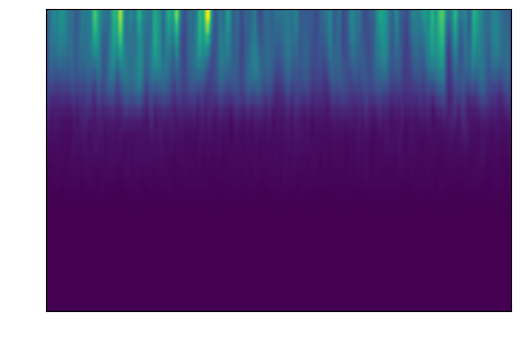

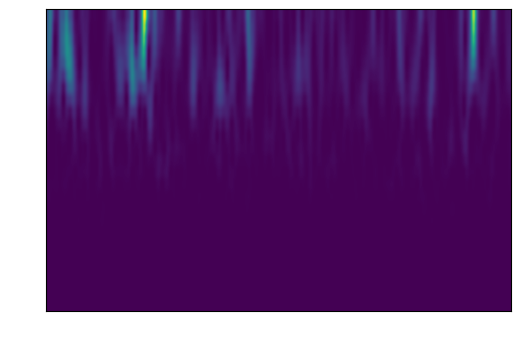

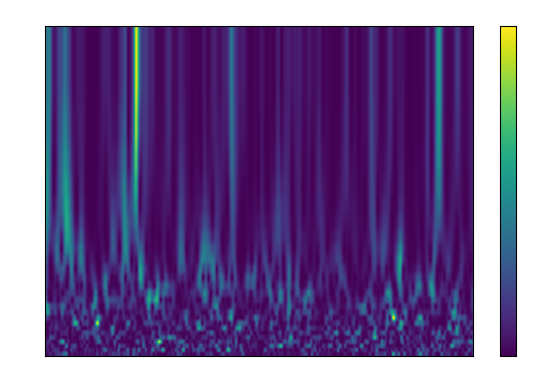

In [52]:
%matplotlib inline
# plt.rcParams['figure.figsize'] = [16, 12]
plt.rcParams['figure.dpi'] = 100
plt.rcParams['text.color'] = 'white'
plt.rcParams['xtick.color'] = 'white'
plt.rcParams['ytick.color'] = 'white'

epoch, channel = 1, 8

avg_spectrum = mrl.data[:,channel].mean(axis=0)
plt.imshow(avg_spectrum, aspect='auto', extent=[-2, 8, 100, 3])
plt.show()
plot_data = mrl.data[epoch, channel]
plt.imshow(plot_data , aspect='auto', extent=[-2, 8, 100, 3])
plot_data = mrl.data[epoch, channel] / avg_spectrum

fig, ax = plt.subplots(1, 1)
im = ax.imshow(plot_data, aspect='auto', extent=[-2, 8, 100, 3])
ax.set_yscale('log')
ax.set_title(mrl.ch_names[channel], fontsize=8)
fig.colorbar(im, ax=ax)

plt.tight_layout()
plt.show()

In [ ]:
# %matplotlib inline
# plt.rcParams['figure.figsize'] = [16, 12]
# plt.rcParams['figure.dpi'] = 100
# plt.rcParams['text.color'] = 'white'
# plt.rcParams['xtick.color'] = 'white'
# plt.rcParams['ytick.color'] = 'white'

# def plot_morlet(mrl, ep, r=5, c=5, norm=False, log=False):
#     avg_spectrum = mrl.data.mean(axis=0)
#     for n in range(int(len(mrl[0].ch_names) / (r * c)) + 1):
#         fig, axs = plt.subplots(r, c)
#         for i in range(r * c):
#             try:
#                 ax = axs[int(i / c), i % c]
#                 plot_data = mrl.data[ep, r * c * n + i]
#                 if norm: plot_data = mrl.data[ep, r * c * n + i] / avg_spectrum

#                 im = ax.imshow(plot_data, aspect='auto', extent=[-2, 8, 100, 1])
#                 if log: ax.set_yscale('log')

#                 ax.set_title(mrl.ch_names[r * c * n + i], fontsize=8)
#                 fig.colorbar(im, ax=ax)
#                 # print(f'plotted ch number {r * c * n + i}')
#             except Exception as e:
#                 ax.remove()
#                 pass
#         plt.tight_layout()
#         plt.show()
    

# epoch_number, r, c = 0, 2, 4
# plot_morlet(mrl.pick(amygdala_channels), ep=epoch_number, r=r, c=c, norm=True, log=True)

<Figure size 1600x1200 with 0 Axes>